## Scrap book for feature decoding with pseudo pops, split by rule dims 

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.pseudo_utils as pseudo_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.behavioral_utils as behavioral_utils
from utils.session_data import SessionData

from models.trainer import Trainer
from models.model_wrapper import ModelWrapper, ModelWrapperLinearRegression
from models.multinomial_logistic_regressor import NormedDropoutMultinomialLogisticRegressor

from trial_splitters.rule_condition_block_splitter import RuleConditionBlockSplitter
from trial_splitters.condition_kfold_block_splitter import ConditionKFoldBlockSplitter

from sklearn.model_selection import KFold
import os
import json

import matplotlib.pyplot as plt
import utils.visualization_utils as visualization_utils


### Check feature decoding of last 8 corrects, with random and block splitting

Text(0, 0.5, 'Decoder Accuracy')

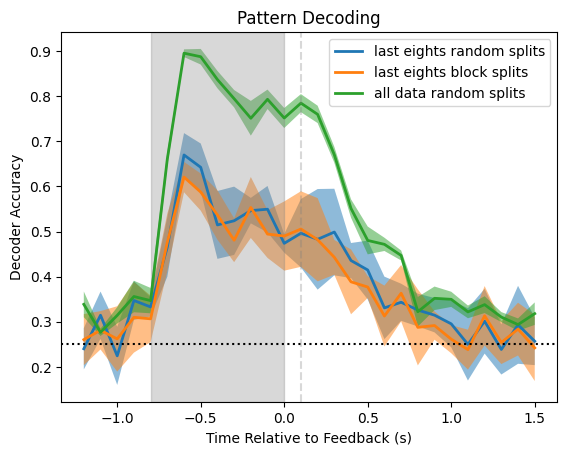

In [3]:
# visualize color: 
feature_dim = "Pattern"
random_test = np.load(f"/data/patrick_scratch/pseudo/last_eights_{feature_dim}_random_test_accs.npy")
block_test = np.load(f"/data/patrick_scratch/pseudo/last_eights_{feature_dim}_block_test_accs.npy")
full_test = np.load(f"/data/patrick_scratch/pseudo/{feature_dim}_test_accs.npy")

fix, ax = plt.subplots()
visualization_utils.visualize_accuracy_across_time_bins(
    random_test,
    1.3, 1.5, 0.1,
    ax,
    label=f"last eights random splits",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    block_test,
    1.3, 1.5, 0.1,
    ax,
    label=f"last eights block splits",
    right_align=True, 
)
visualization_utils.visualize_accuracy_across_time_bins(
    full_test,
    1.3, 1.5, 0.1,
    ax,
    label=f"all data random splits",
    right_align=True, 
)
ax.legend()
ax.set_title(f"{feature_dim} Decoding")
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### Look at prelim results

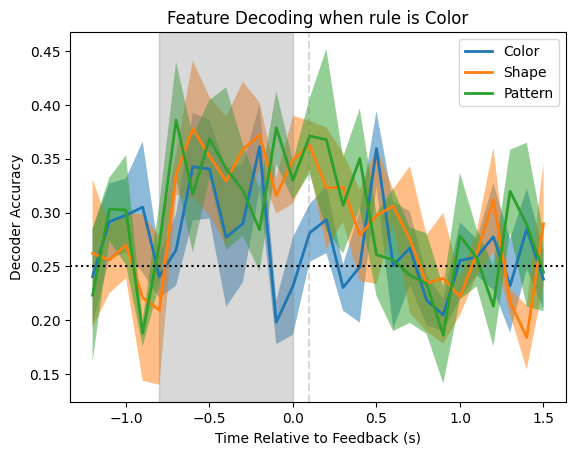

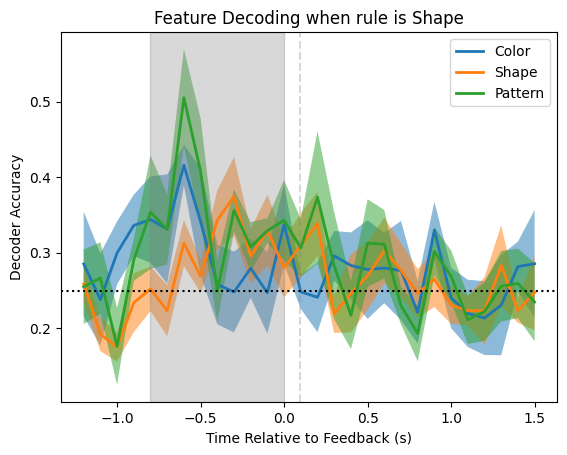

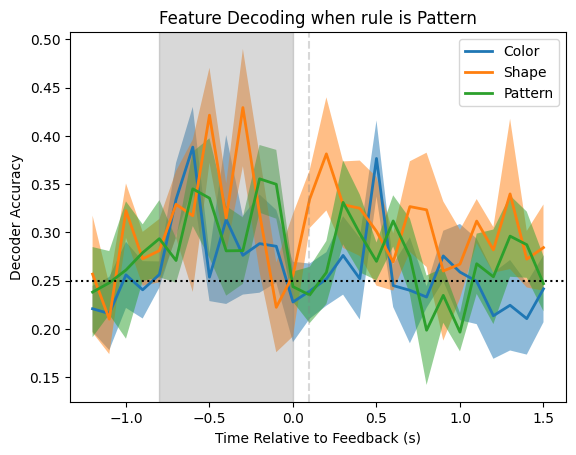

In [4]:
feature_dims = ["Color", "Shape", "Pattern"]

for i, rule_dim in enumerate(feature_dims):
    fix, ax = plt.subplots()
    for feature_dim in feature_dims:
        test_res = np.load(f"/data/patrick_scratch/pseudo/rule_dim_{rule_dim}_{feature_dim}_decoding_test_accs.npy")
        # train_res = np.load(f"/data/patrick_scratch/pseudo/rule_dim_{rule_dim}_{feature_dim}_decoding_train_accs.npy")
        visualization_utils.visualize_accuracy_across_time_bins(
            test_res,
            1.3, 1.5, 0.1,
            ax,
            label=feature_dim,
            right_align=True, 
        ) 
        # visualization_utils.visualize_accuracy_across_time_bins(
        #     train_res,
        #     1.3, 1.5, 0.1,
        #     ax[i],
        #     label=feature_dim,
        #     right_align=True, 
        # )  
    ax.legend()
    ax.set_title(f"Feature Decoding when rule is {rule_dim}")
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")
     

## plot again just re-aranged

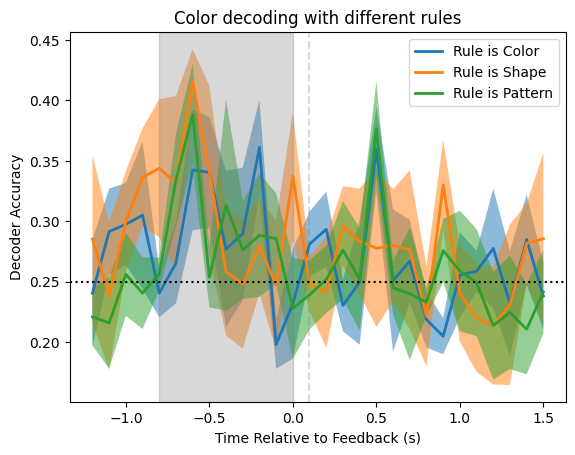

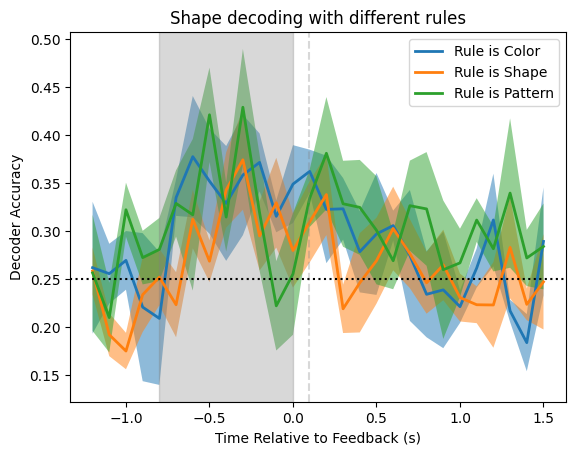

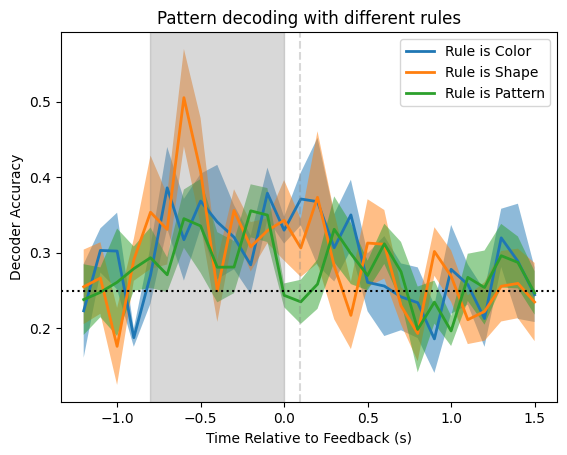

In [5]:
feature_dims = ["Color", "Shape", "Pattern"]

for i, feature_dim in enumerate(feature_dims):
    fix, ax = plt.subplots()
    for rule_dim in feature_dims:
        test_res = np.load(f"/data/patrick_scratch/pseudo/rule_dim_{rule_dim}_{feature_dim}_decoding_test_accs.npy")
        # train_res = np.load(f"/data/patrick_scratch/pseudo/rule_dim_{rule_dim}_{feature_dim}_decoding_train_accs.npy")
        visualization_utils.visualize_accuracy_across_time_bins(
            test_res,
            1.3, 1.5, 0.1,
            ax,
            label=f"Rule is {rule_dim}",
            right_align=True, 
        ) 
        # visualization_utils.visualize_accuracy_across_time_bins(
        #     train_res,
        #     1.3, 1.5, 0.1,
        #     ax[i],
        #     label=feature_dim,
        #     right_align=True, 
        # )  
    ax.legend()
    ax.set_title(f"{feature_dim} decoding with different rules")
    ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
    ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
    ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
    ax.set_xlabel("Time Relative to Feedback (s)")
    ax.set_ylabel("Decoder Accuracy")
     

## Plot original pseudo results all in one plot